# EDA on Faces Dataset

* Dataset Location: https://susanqq.github.io/UTKFace/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/App/CycleGAN/Faces/UTKFace.tar.gz' /content

In [0]:
!cp '/content/drive/My Drive/App/CycleGAN/Faces/crop_part1.tar.gz' /content

In [0]:
!gunzip /content/UTKFace.tar.gz

In [0]:
!tar -xvf /content/UTKFace.tar

In [0]:
!gunzip /content/crop_part1.tar.gz


In [0]:
!tar -xf /content/crop_part1.tar

## Examine the dataset

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

### Load Images

In [0]:
# load a single image
def load_image(file_name):
  img = Image.open(file_name)
  img = img.convert('RGB')
  img = img.resize((256,256), Image.ANTIALIAS)
  return(np.asarray(img))

In [0]:
# load images
def load_images(location, file_list):
  image_list = []
  for file in file_list:
    path = os.path.join(location, file)
    img = load_image(path)
    image_list.append(img)
    
  return(np.asarray(image_list))
    

### Display

In [0]:
# plot faces
def plot_faces(faces, row, col):
  for i in range(row*col):
    plt.subplot(row, col, 1+i)
    plt.imshow(faces[i])
    plt.axis('off')
  plt.show()

In [0]:
FACES_LOC = '/content/UTKFace'
faces_filenames = os.listdir(FACES_LOC)

In [13]:
len(faces_filenames)

23708

In [14]:
faces_filenames[0]

'8_1_0_20170109204910999.jpg.chip.jpg'

In [0]:
faces = load_images(FACES_LOC, faces_filenames[0:25])

In [28]:
faces.shape

(25, 200, 200, 3)

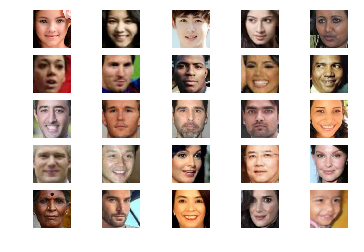

In [29]:
plot_faces(faces, 5, 5)

## Convert to Numpy Array

In [0]:
all_faces = load_images(FACES_LOC, faces_filenames)

In [31]:
all_faces.shape

(23708, 200, 200, 3)

In [0]:
np.savez_compressed('/content/faces.npz', all_faces)

## Let's use already corpped dataset

* The filenames are tagged as per age (age_gender_race etc)

In [0]:
## Create youth cateogary
!mkdir /content/faces_dataset


In [0]:
!mkdir /content/faces_dataset/young
!mkdir /content/faces_dataset/old

In [38]:
#19 to 25
#!cp '/content/faces_part1/19*.jpg' /content/faces_dataset/young

cp: cannot stat '/content/faces_part1/19*.jpg': No such file or directory


In [0]:
!rm -rf /content/faces_dataset

In [0]:
!cp '/content/drive/My Drive/App/CycleGAN/Faces/faces_dataset.zip' /content

In [0]:
!unzip /content/faces_dataset.zip

In [0]:
DS_LOC = '/content/faces_dataset'
young_filenames = os.listdir(os.path.join(DS_LOC, 'young'))
old_filenames = os.listdir(os.path.join(DS_LOC,'old'))

In [46]:
len(young_filenames)

1056

In [47]:
young_filenames[0]

'21_1_3_20170104231602346.jpg.chip.jpg'

In [48]:
len(old_filenames)

1075

In [49]:
old_filenames[0]

'50_1_0_20170109012358091.jpg.chip.jpg'

In [0]:
young_images = load_images(os.path.join(DS_LOC, 'young'),young_filenames)

In [58]:
young_images.shape

(1056, 256, 256, 3)

In [0]:
old_images = load_images(os.path.join(DS_LOC, 'old'), old_filenames[0:1056])

In [62]:
old_images.shape

(1056, 256, 256, 3)

In [0]:
np.savez_compressed('/content/young.npz', young_images)

In [0]:
np.savez_compressed('/content/old.npz', old_images)

In [67]:
!ls -l /content/young.npz
!ls -l /content/old.npz


-rw-r--r-- 1 root root 149405257 Aug  6 08:09 /content/young.npz
-rw-r--r-- 1 root root 152210318 Aug  6 08:09 /content/old.npz


In [0]:
!cp /content/young.npz '/content/drive/My Drive/App/CycleGAN/Faces'
!cp /content/old.npz '/content/drive/My Drive/App/CycleGAN/Faces'

## load the data and verify

In [0]:
young = np.load('/content/young.npz')

In [72]:
young_images = young['arr_0']

(1056, 256, 256, 3)

In [0]:
old = np.load('/content/old.npz')

In [0]:
old_images = old['arr_0']

In [75]:
old_images.shape

(1056, 256, 256, 3)

## Plot Young Faces

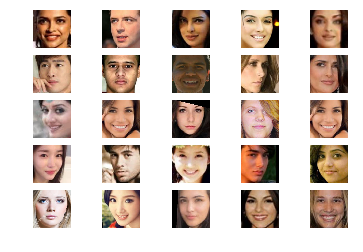

In [78]:
plot_faces(young_images[0:25], 5, 5)

## Plot Old faces

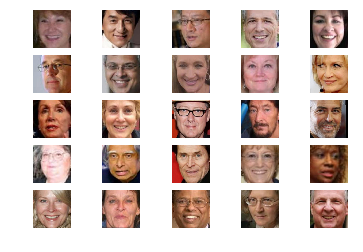

In [80]:
plot_faces(old_images[0:25], 5, 5)